In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fb = pd.read_csv('/root/Desktop/fb.csv',  encoding='utf-8-sig')
fb.shape

(251, 6)

In [3]:
dates = fb['Date']
close = fb['Close']

In [4]:
spread = ((fb['High']-fb['Low'])/fb['Low'])*100
per_change = ((fb['Close']-fb['Open'])/fb['Open'])*100

In [5]:
fb['Spread'] = spread
fb['Per_Change'] = per_change
fb.head()

,Date,Open,High,Low,Close,Volume,Spread,Per_Change
0,30-Nov-16,120.32,121.79,117.95,118.42,30035555,3.255617,-1.579122
1,29-Nov-16,120.57,122.10,120.40,120.87,18890956,1.411960,0.248818
2,28-Nov-16,120.12,121.69,119.82,120.41,18101314,1.560674,0.241425
3,25-Nov-16,121.01,121.14,120.07,120.38,8658605,0.891147,-0.520618
4,23-Nov-16,121.23,121.31,119.94,120.84,15672136,1.142238,-0.321703


In [6]:
df = fb[['Close','Volume','Spread','Per_Change']]

In [7]:
import math
closecol = 'Close'
df.fillna(value=-99999, inplace=True)
sevendays = 7

/root/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [8]:
df['label'] = df[closecol].shift(-sevendays)

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
df.tail()

,Close,Volume,Spread,Per_Change,label
246,104.60,23517268,2.790922,-1.488039,NaN
247,106.49,20401791,2.847523,2.394231,NaN
248,105.61,15474890,2.073380,-0.817055,NaN
249,106.18,21224721,3.477092,1.365155,NaN
250,104.38,23236485,3.386551,0.413660,NaN


In [10]:
df.dropna(inplace=True)

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])
from sklearn.cross_validation import train_test_split

/root/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [13]:
X_train.shape

(183, 4)

In [14]:
y_train.shape

(183,)

In [15]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.neighbors import KNeighborsRegressor

In [27]:
scores = []
for k in [KNeighborsRegressor(), RANSACRegressor(), HuberRegressor(), ARDRegression(),
          PassiveAggressiveRegressor(), BayesianRidge(), Lasso(), LassoLars(), Ridge(), SVR(), XGBRegressor(),
          RandomForestRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(), LinearRegression(),
          TheilSenRegressor()]:
    clf = k
    k.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))

In [28]:
scores

[0.0430466274418142,
 0.75944707148145418,
 -35.526061887256247,
 0.73949082822244117,
 -558.21856066332862,
 0.76492430305376558,
 0.73219302369899442,
 -0.00067139310677877262,
 0.7731569309829962,
 -0.00075050083572758552,
 0.76341134992324533,
 0.78568142453171841,
 0.75917512854051683,
 0.76416332644140328,
 0.77337348869450706,
 0.7555655337171816]

In [29]:
max(scores)

0.78568142453171841

In [30]:
from sklearn.grid_search import GridSearchCV

/root/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [31]:
model = RandomForestRegressor()

In [32]:
parameters = {'n_estimators':[10,100,1000],'min_impurity_split':[1e-7,1e-4,1e-1],'min_samples_split':[2,10,20]}
clf = GridSearchCV(model, parameters ,n_jobs=-1,cv=5)

In [34]:
clf.fit(X_train,y_train)
clf.grid_scores_, clf.best_params_, clf.best_score_

([mean: 0.73698, std: 0.04375, params: {'min_samples_split': 2, 'min_impurity_split': 1e-07, 'n_estimators': 10},
  mean: 0.74572, std: 0.02889, params: {'min_samples_split': 2, 'min_impurity_split': 1e-07, 'n_estimators': 100},
  mean: 0.74565, std: 0.02281, params: {'min_samples_split': 2, 'min_impurity_split': 1e-07, 'n_estimators': 1000},
  mean: 0.75467, std: 0.03367, params: {'min_samples_split': 10, 'min_impurity_split': 1e-07, 'n_estimators': 10},
  mean: 0.75281, std: 0.02414, params: {'min_samples_split': 10, 'min_impurity_split': 1e-07, 'n_estimators': 100},
  mean: 0.74669, std: 0.02509, params: {'min_samples_split': 10, 'min_impurity_split': 1e-07, 'n_estimators': 1000},
  mean: 0.73696, std: 0.03065, params: {'min_samples_split': 20, 'min_impurity_split': 1e-07, 'n_estimators': 10},
  mean: 0.75141, std: 0.03103, params: {'min_samples_split': 20, 'min_impurity_split': 1e-07, 'n_estimators': 100},
  mean: 0.75427, std: 0.03381, params: {'min_samples_split': 20, 'min_impuri

In [42]:
model = RandomForestRegressor(min_impurity_split=0.1,min_samples_split=20,n_estimators=1000)

In [43]:
df = fb[['Close','Volume','Spread','Per_Change']]
df['label'] = df[closecol].shift(-sevendays)
X = np.array(df.drop(['label'],1)) 
X_lately = X[-sevendays:] 
X = X[:-sevendays]
y = df['label']
y.dropna(inplace=True)

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/root/anaconda2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


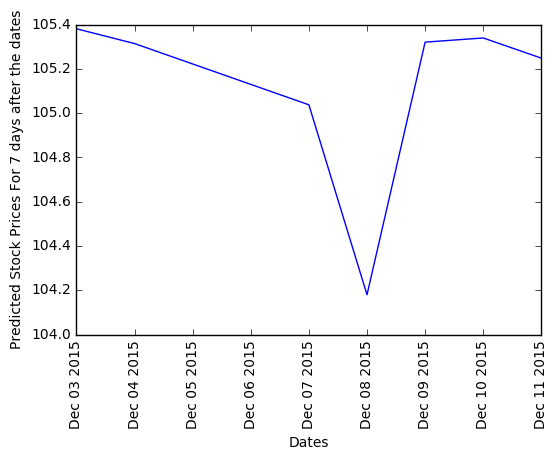

In [44]:
model.fit(X,y)
y_pred = model.predict(X_lately)
%matplotlib inline
X_lately_dates = dates[-sevendays:]
plt.plot_date(X_lately_dates,y_pred,'-')
plt.xticks(rotation='vertical')
plt.xlabel('Dates')
plt.ylabel('Predicted Stock Prices For 7 days after the dates')